# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,total clients,debt sum,correlation
children,,,
5,9,0,0.000000
0,14091,1063,0.075438
3,330,27,0.081818
1,4808,444,0.092346
2,2052,194,0.094542
4,41,4,0.097561


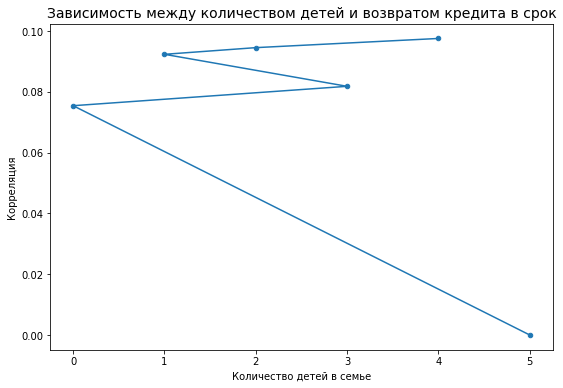

In [22]:
import matplotlib.pyplot as plt


%matplotlib inline

child_debt = pd.pivot_table(data, index = ['children'], values ='debt', aggfunc = {'count', 'sum'})
child_debt.columns.tolist()
child_debt['correlation'] = child_debt['sum'] / child_debt['count']
child_debt = child_debt.rename(columns={'count':'total clients','sum':'debt sum'})
child_debt = child_debt.sort_values(by = 'correlation', ascending = True)
display(child_debt)

plt.figure(figsize = (9, 6))
plt.plot(child_debt['correlation'], marker='.', 
         markersize=9)
plt.title('Зависимость между количеством детей и возвратом кредита в срок',fontsize=14)
plt.xlabel('Количество детей в семье')
plt.ylabel('Корреляция')
plt.show()

**Вывод:** зависимость между количеством детей и возвратом кредита в срок существует.
Исходя из полученных данных, заёмщики с пятью детьми в семье возвращают денежные средства в банк точно в срок. Однако прошу заметить, что количество кредитующихся клиентов с количеством детей в семье равном 5 всего 9. При увеличении числа таких заёмщиков, не факт, что сохранится тенденция в возращении денежных средств точно в срок у данной группы клентов. Можно предположить, что заёмщики данного банка с пятью детьми в семье высокоогранизованы в планировании семейного бюджета.

Бездетные заёмщики допускают небольшую просрочку в выплате кредита немногим реже, чем клиенты с тремя детьми. Данное повеждение может быть обусловлено малой организованностью в планировании семейного бюджета для бездетных заёмщиков и хорошей организованностью семейного бюджета с невозможностью оценить экстенные траты для клиентов с тремя детьми. Например: детям свойственнно болеть, а заболевают они, как правило, в одно время. Соответственно, лечение трёх детей сразу - серьёзная незапланнированная нагрузка на семейный бюджет.

Заёмщики с одним ребенком в семье реже допускают просрочки в платежах по кредитам, чем заёмщики с двумя детьми, но чаще чем бездетные заёмщики и клиенты с тремя и пятью детьми. Данное поведение может быть обусловлено недостаточным опытом в составлении семейного бюджета для клиентов с одним ребенком и увеличением нагрузки на семейный бюджет при появлении второго ребенка в семьях. Данное поведение частично поддтвержает гипотезу.

Группа заёмщиков с чётырьмя детьми, соостоящая всего из 41 клиентов чаще всех остальных групп допускает просрочки по платежам. Данное поведение может быть обусловлено низкой организованностью семейного бюджета и/или высокой финансовой нагрузкой на бюджет семьи на содержание четырёх детей.    

На графике, если не учитывать группу заёмщиков с пятью детьми в семье, прослеживается слабая тенденция к увеличению числа просрочек с увеличением числа детей в семье.  

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,total clients,debt sum,correlation
family_status,,,
вдовец / вдова,951,63,0.066246
в разводе,1189,84,0.070648
женат / замужем,12261,927,0.075606
гражданский брак,4134,385,0.093130
Не женат / не замужем,2796,273,0.097639


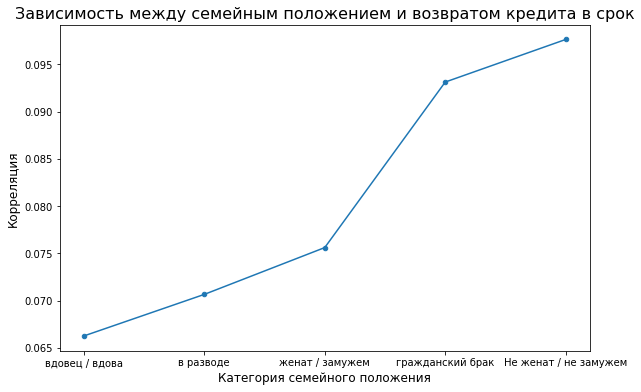

In [23]:
marrige_debt = pd.pivot_table(data, index = ['family_status'], values ='debt', aggfunc = {'count', 'sum'})
marrige_debt.columns.tolist()
marrige_debt['correlation'] = marrige_debt['sum'] / marrige_debt['count']
marrige_debt = marrige_debt.rename(columns={'count':'total clients','sum':'debt sum'})
marrige_debt = marrige_debt.sort_values(by = 'correlation', ascending = True)
display(marrige_debt)

plt.figure(figsize = (9.5, 6))
plt.plot(marrige_debt['correlation'], marker='.', 
         markersize=9)
plt.title('Зависимость между семейным положением и возвратом кредита в срок',fontsize=16)
plt.xlabel('Категория семейного положения',fontsize=12)
plt.ylabel('Корреляция',fontsize=12)
plt.show()

**Вывод:** Существует зависимость между семейным положением и возвратом кредита в срок.
Клиенты вдовцы /вдовы и в разводе реже остальных групп допускают просрочки в платежах по кредиты. Обусловлено данное поведение может быть тем, что данные категории клиентов привыкли более тчательно планировать свой бюджет, поскольку уже были в браке, где требовалось умение граммотно распределять денежные средства. Схожее поведение выплат имеют клиенты состоящие в браке, что поддтвержает вышесказанное. 

Заёмщики, состоящие в гражданском браке, намного чаще допускают просрочки по платежам кредита, что может быть обусловлено большей свободой денежных отношений в таком виде брака, или недостатком опыта в выстраивании семейного бюджета, или ввиду молодого возраста, или другими факторами. 

Наиболее частые просрочки по кредиту у клиентов не состоящих в браке. Что может быть обусловлено в неумении планирования своего бюджета, реализацией своих "хотелок" здесь и сейчас или недостатком опыта в денежных отношениях ввиду молодого возраста.

Зависимость между семейным положением и возвратом кредита в срок, описанная выше, отлично видна при визуализации полученных данных, в данном случае на графике.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,total clients,debt sum,correlation
total_income_category,,,
D,349,21,0.060172
B,5014,354,0.070602
A,25,2,0.080000
C,15921,1353,0.084982
E,22,2,0.090909


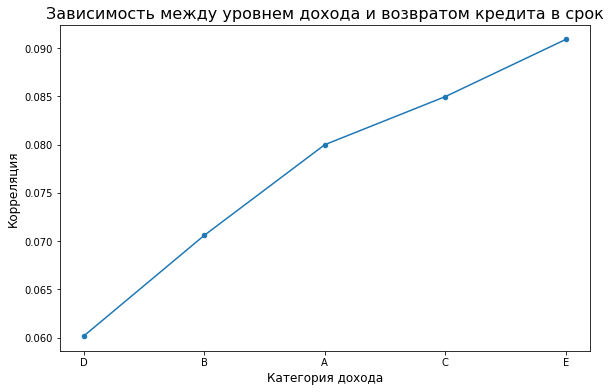

In [24]:
zp_debt = pd.pivot_table(data, index = ['total_income_category'], values ='debt', aggfunc = {'count', 'sum'})
zp_debt.columns.tolist()
zp_debt['correlation'] = zp_debt['sum'] / zp_debt['count']
zp_debt = zp_debt.rename(columns={'count':'total clients','sum':'debt sum'})
zp_debt = zp_debt.sort_values(by = 'correlation', ascending = True)
display(zp_debt)

plt.figure(figsize = (9.5, 6))
plt.plot(zp_debt['correlation'], marker='.', 
         markersize=9)
plt.title('Зависимость между уровнем дохода и возвратом кредита в срок',fontsize=16)
plt.xlabel('Категория дохода',fontsize=12)
plt.ylabel('Корреляция',fontsize=12)
plt.show()

**Вывод:** Существует зависимость между уровнем дохода и возвратом кредита в срок.
Чаще всего просрочки по кредиту наблюдаются у группы заёмщиков, состоящих из 22 человек, с доходом до 30 тысяч, что может быть обусловлено недостаточным доходом для погашения кредита в срок, а непогашение кредита в срок приводит к увеличению финансовой нагрузки на платильщика ввиду штрафов, котовые дополнительно "съедают" часть и так низкого дохода, что приводит к увеличению просрочки по кредиту.

Чуть реже просрочки по кредиту у клиентов с доходом от 50 до 200 тысяч. Это самая многочисленная группа. Чаще всего просрочки в данной группе обусловлены или неумением планировать свой бюджет или наличием у заёмщика более чем одного кредита, последнее же приводит к выбору заёмщика о погашении того кредита вовремя, где сумма штрафа за просрочку выше.

Немногим реже просрочки по кредиту у клиентов с доходом более 1000000. Таких клиентов всего 25. Скорее просрочки оплаты по кредиту в данной группе обусловлены высокой занятостью таких заёмщиков, а так же денежной возможностью оплачивать штрафы за просрочку платежей.

Реже всех групп просрочки по кредиту у клиентов с доходом от 30 до 50 тысяч. Это может быть обусловлено отсутствием возможности оплаты штрафных платежей сверх суммы оплаты кредита. 

Немногим чаще просрочки по кредиту у клиентов с доходом от 200 тысяч до 1000000. Возможно, это обуславливается тем, что данная группа людей умеет хорошо планировать свой бюджет и не хочет терять деньги за просроки, несмотря на немалый доход. 

Однако, прошу заметить, что категории заёмщиков с доходом менее 30 тысяч и более 1000000 весьма немногочисленны. Количество клиенов первой группы всего 22 человека, а второй - 25. И нет гарантии в том, что при увеличении количества заёмщиков из описанных выше групп сохранятся полученные в данном исследовании тенденции к просрочке выплат по кредиту. 

На визуалицзации, если отбросить малочисленные группы "А" и "Е" можно увидеть возрастание числа просрочек по кредиту при возрастании уровня дохода от 30 до 200 тысяч у заёмщиков данного банка. Однако при возрастании дохода дальше - от 200 тысяч до 1000000 наблюдается явный спад числа просрочек по платежам кредита.  

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,total clients,debt sum,correlation
purpose_category,,,
операции с недвижимостью,10751,780,0.072551
проведение свадьбы,2313,183,0.079118
получение образования,3988,369,0.092528
операции с автомобилем,4279,400,0.093480


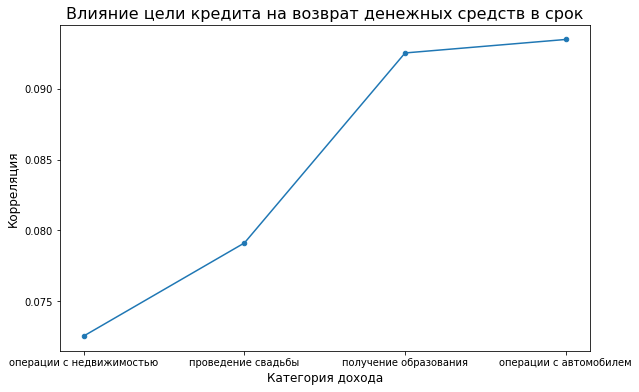

In [25]:
purpose_debt = pd.pivot_table(data, index = ['purpose_category'], values ='debt', aggfunc = {'count', 'sum'})
purpose_debt.columns.tolist()
purpose_debt["correlation"] = purpose_debt['sum'] / purpose_debt['count']
purpose_debt = purpose_debt.rename(columns={'count':'total clients','sum':'debt sum'})
purpose_debt = purpose_debt.sort_values(by = 'correlation', ascending = True)
display(purpose_debt)

plt.figure(figsize = (9.5, 6))
plt.plot(purpose_debt['correlation'], marker='.', 
         markersize=9)
plt.title('Влияние цели кредита на возврат денежных средств в срок',fontsize=16)
plt.xlabel('Категория дохода',fontsize=12)
plt.ylabel('Корреляция',fontsize=12)
plt.show()

**Вывод:** Существует корреляция между целью кредита влияют и его возвратом в срок. Заёмщикми покупающие недвижимость реже всего имеют просрочки по платежам кредита, что может быть обусловленно достаточно высокими штрафами за неисполнение обязательств в срок. Немногим чаще имеют просрочки заёмщики, бравшие кредит на свадьбу. Вщзможно это связано с тем, что обязательства по кредиту уже вложены в расходы при планировании семейного бюджета, а просрочки связаны больше с экстренными незапланированными тратами.

Чаще всего просрочки наблюдаются у заёмщиков, бравших кредит на получение образования и на операции с автомобилем. Что может быть связано с тем, что стоимость образования существенно ниже, чем стоимость недвижимости, соответственно, штрафные платежи тоже ниже. В случае кредита на автомобиль, возможная причина просрочек: дорогостоющие ремонты агрегатов и кузова машины, а так же покупка всех возможных дополнительных расходников для эксплуатации автомобиля (например: шины или колёса).  

На графике отлично видно рост числа просрочек по кредиту на категории "получение образования" и "операции с автомобилем" относительно числа просрочек на категории "операции с недвижимостью" и "проведение свадьбы". 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* пропуски в данных были в столбцах days_employed и total_income. Скорее всего причина - человеческий фактор. Либо заёмщики забыли заполнить эти графы, либо не пожелали это делать. Данные столбцы, вероятно, не помечены как обязательные к заполнению, поэтому и появились данные пропуски. Но детальней о причинах пропусков следут спросить у разработчика, составлявшего таблицу с данными.
Количество пропусков в столбцах одинаковое, то есть заполненность days_employed зависит от заполненности total_income.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медианное значение менее повержено влиянию выбросов и лучше всего характеризует выборку данных.

### Шаг 4: общий вывод.

В данном исследовании была прооведена работа с данными о клиентах - заёмщиках банка заказчика. Цели работы: выявление зависимостей количества детей в семье заёмщика, его семейного положения, уровня дохода и цели кредита на возврат денежных средств банку в срок.

Для выявления данных зависимостей были составлены сводные таблицы и построены графики, а так же на каждом этапе были сделаны промежуточные выводы.

Результат исследования:
Зависимости количества детей и уровнем дохода от выплат по кредиту в срок существуют, но несущественные. Зависимости же целей кредита и семейного положения от выплат по кредиту в срок уже более очевидны.

В целом, исходя из полученных данных можно сделать вывод, что с большей верояностью не будет платить в срок клент и/или с 4 детьми в семье и/или не находился/не находятся в официальном браке и/или с доходом от 30 до 200 тысяч и/или с целью кредитования: получение образования и операции с автомобилем. И наоборот, с большей долей вероятности, в срок будет платить заёмщик и/или неимеющий детей и/или ранее состоявший в браке и/или имеющий доход либо от 30 до 50 тысяч либо от 200 тысяч до 1000000 и/или с целью кредита: операции с недвижимостью или проведение свадьбы.  

Рекомендации: для более корректной оценки зависимостей количества детей и уровня дохода от выплат по кредиту в срок требуется увеличение количества данных для групп:
 - заёмщики имеющие в семьё 5 детей;
 - заёмщики с доходом менее 30 тысяч;
 - заёмщики с доходом более 1000000.
 
Так как по малым выборкам клиентов делать выводы нельзя, поскольку полученный в данной работе характер возврата денежных средств для каждой категории, маловероятно сохранится при увеличении количества заёмщиков в каждой группе. 